## Lending club Case Study

LendingClub is USA’s largest lending marketplace, connecting borrowers with investors since 2007.

Both borrower and investor are registered as a member of Lending club. Borrower applied for loan, then lending club platform perform some risk analysis on the applied loan and pass it to investors with approved ammount ( lenders/Investors ). 

Lenders ( Investors ) makes money from the interest they get from money they lend and Lending club makes money from source fees and other fees.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [75]:
# Loading loan data
loan = pd.read_csv("loan/loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [76]:
#Detrmining the number of column and rows

loan.shape

(39717, 111)

##### Observations :  
1. There are 39717 rows and 111 features. So data set is a high dimentional data set. 
2. We also find there are lots of features that is having only NA value which will not contribute to our analysys.
3. There are few features having same constant values which will not contribute to our analysis.
4. There are identity columns having unique values which will add any value to the data set for analysis.

####  Checking and dropping the columns ( features ) having null values

In [77]:
#checking first half of the columns for null value
loan.isnull().sum().head(int(loan.shape[1]/2))

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       2459
emp_length                      1075
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                           12940
purpose                            0
title                             11
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
i

In [78]:
#checking second half of the columns for null values
loan.isnull().sum().tail(int(loan.shape[1]/2))

acc_now_delinq                        0
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717
chargeoff_within_12_mths             56
delinq_amnt                           0
mo_sin_old_il_acct                39717


In [79]:
#Dropping columns having all null values
loan.dropna(axis=1, how='all', inplace=True)

In [80]:
# There was ( 111-57) = 54 columns having all null value. Now the number of column become 57.
loan.shape

(39717, 57)

In [81]:
#Getting the information about load data set
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Dropping the features having same constant value through out.
Features with constant values through out
1. delinq_amnt
2. acc_now_delinq
3. pymnt_plan

In [82]:
loan.drop(columns =["delinq_amnt","acc_now_delinq","pymnt_plan"], axis=1, inplace=True)

#### Dropping the identity columns having unique values
1. id
2. member_id

In [83]:
loan.drop(columns =["id","member_id"], axis=1, inplace=True)

#### Identifying customer behaviour variable and removal
Customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. So following customer behavior variable can be deleted
1. delinq_2yrs
2. earliest_cr_line
3. inq_last_6mths
4. open_acc
5. pub_rec
6. revol_bal
7. revol_util
8. total_acc
9. out_prncp
10. out_prncp_inv
11. total_pymnt
12. total_pymnt_inv
13. total_rec_prncp
14. total_rec_int
15. total_rec_late_fee
16. recoveries
17. collection_recovery_fee
18. last_pymnt_d
19. last_pymnt_amnt
20. last_credit_pull_d
21. application_type

In [84]:
loan.drop(columns =["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"], axis=1, inplace=True)

In [85]:
#Checking the number of available features now
loan.shape

(39717, 31)

In [86]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

### Data Analysis

Since loan status "current" is ambiguious as loan defaulter point of view ( this loan might be dafaulter in future ) 
and analysis is being done to understand the driving factors (or driver variables) behind loan default, we can consider only "Fully Paid" and "Charged Off" loans.

In [87]:
loan = loan[~(loan.loan_status == "Current")]

In [88]:
loan.shape

(38577, 31)

In [89]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,2740.000000,38521.0,38577.0,38521.0,37880.000000,38538.0
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,35.882534,69.260949,0.0,1.0,0.0,0.043479,0.0
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,22.028093,43.987761,0.0,0.0,0.0,0.204583,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,18.000000,19.750000,0.0,1.0,0.0,0.000000,0.0
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,34.000000,90.000000,0.0,1.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,52.000000,104.000000,0.0,1.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,0.0,1.0,0.0,2.000000,0.0


#### Univariate analysis :

##### Analysing Annual Income
1. Above loan.describe() data indicates there is some outliers. 
2. We can create bin of annual income for further analysis

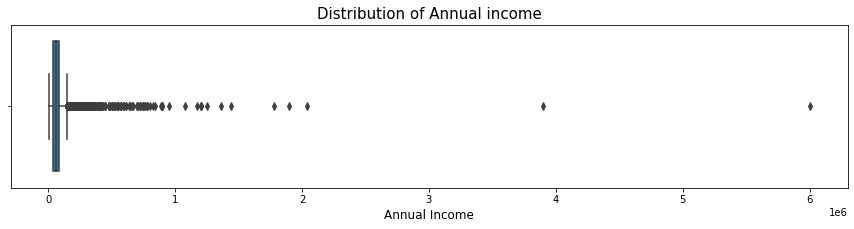

In [90]:
#Analysing and getting rid of outliers
plt.figure(figsize=[15,3])
sns.boxplot(loan.annual_inc)
plt.title("Distribution of Annual income", fontsize=15)
plt.xlabel("Annual Income", fontsize=12)
plt.show()

In [96]:
# Checking quartile information for annual income to see outliers
loan.annual_inc.quantile([0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.99])

0.90    115000.0
0.92    122000.0
0.93    127500.0
0.94    134000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.99    234144.0
Name: annual_inc, dtype: float64

##### Observation 
From above quartile data, 0.93 percentile seems to be good. Let us use 0.93 percentile for cutoff of percentile data

In [101]:
loan = loan[(loan.annual_inc < loan.annual_inc.quantile(0.93))]

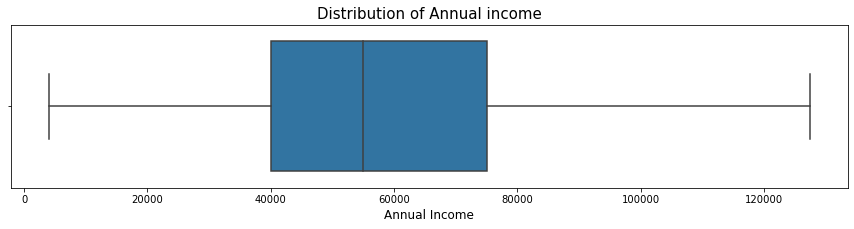

In [102]:
# Checking after removing outliers
plt.figure(figsize=[15,3])
sns.boxplot(loan.annual_inc)
plt.title("Distribution of Annual income", fontsize=15)
plt.xlabel("Annual Income", fontsize=12)
plt.show()

In [115]:
income_slab = (1,40000, 80000,130000)
category =["Low", "Medium", "High"]
loan["income_category"] = pd.cut(loan.annual_inc, income_slab, labels = category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,income_category
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Low
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Low
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Low
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,35.0,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Medium
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,NaN,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Low


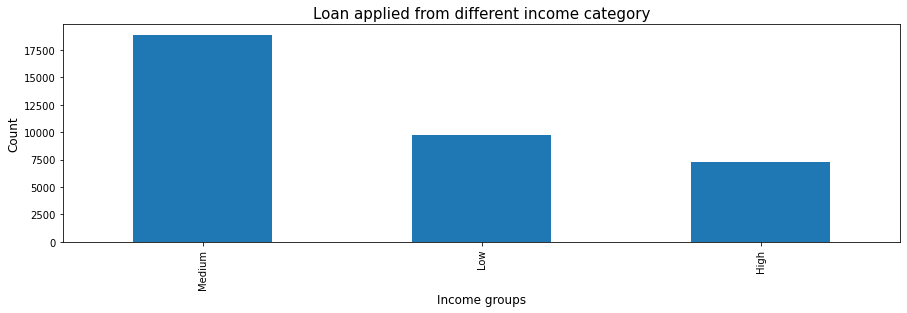

In [132]:
plt.figure(figsize=[15,4])
loan.income_category.value_counts().plot.bar()
plt.title("Loan applied from different income category", fontsize=15)
plt.xlabel("Income groups",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

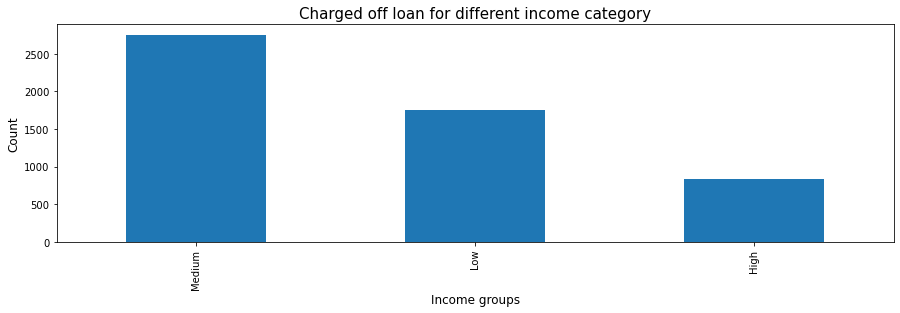

In [133]:
plt.figure(figsize=[15,4])
loan[loan.loan_status == "Charged Off"].income_category.value_counts().plot.bar()
plt.title("Charged off loan for different income category",fontsize=15)
plt.xlabel("Income groups",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

#### Observation 
1. Midium annual income group ( 40000 to 80000 USD ) has taken maximum loan and medium income group also become maximum defaulter.
2. It seems the medium income group tends to be more defaulter

##### Analyzing loan amount

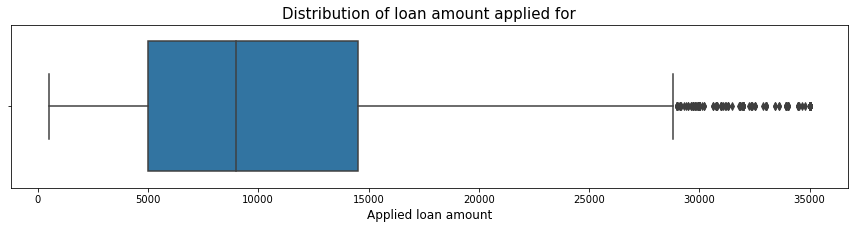

In [134]:
# Checking outliers
plt.figure(figsize=[15,3])
sns.boxplot(loan.loan_amnt)
plt.title("Distribution of loan amount applied for", fontsize=15)
plt.xlabel("Applied loan amount", fontsize=12)
plt.show()

There are outliers but not distnictive enough. So no outlier treatment is necessary for now.

In [137]:
loan_slab = (1,5000, 15000,35000)
category =["5K", "5k-15K", "15K-35K"]
loan["loan_category"] = pd.cut(loan.loan_amnt, loan_slab, labels = category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,mths_since_last_record,initial_list_status,next_pymnt_d,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,income_category,loan_category
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Low,5K
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Low,5K
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Low,5K
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Medium,5k-15K
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,NaN,f,NaN,0.0,1,0.0,0.0,0.0,Low,5K


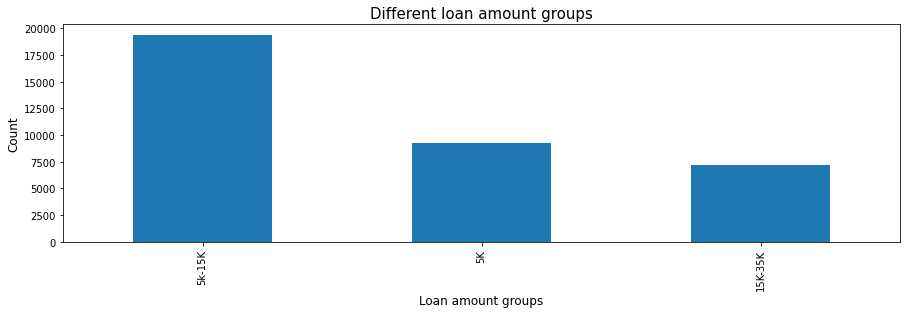

In [141]:
plt.figure(figsize=[15,4])
loan.loan_category.value_counts().plot.bar()
plt.title("Different loan amount groups", fontsize=15)
plt.xlabel("Loan amount groups",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

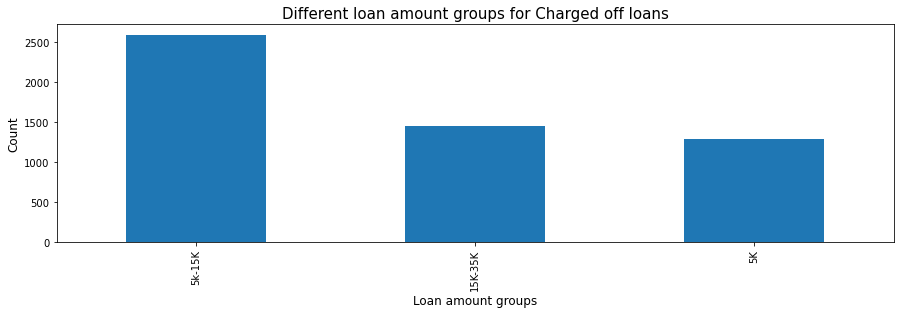

In [143]:
plt.figure(figsize=[15,4])
loan[loan.loan_status == "Charged Off"].loan_category.value_counts().plot.bar()
plt.title("Different loan amount groups for Charged off loans", fontsize=15)
plt.xlabel("Loan amount groups",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

#### Observations 
1. 5K to 15K is the loan amount range where most people applied and also get defaulted

##### Analyzing loan term

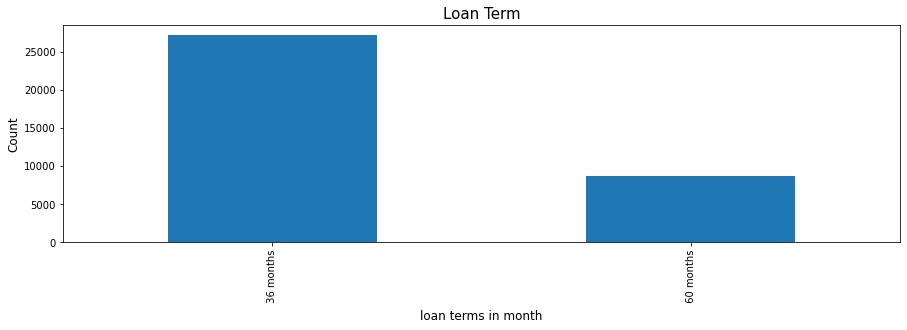

In [147]:
plt.figure(figsize=[15,4])
loan.term.value_counts().plot.bar()
plt.title("Loan Term", fontsize=15)
plt.xlabel("loan terms in month",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

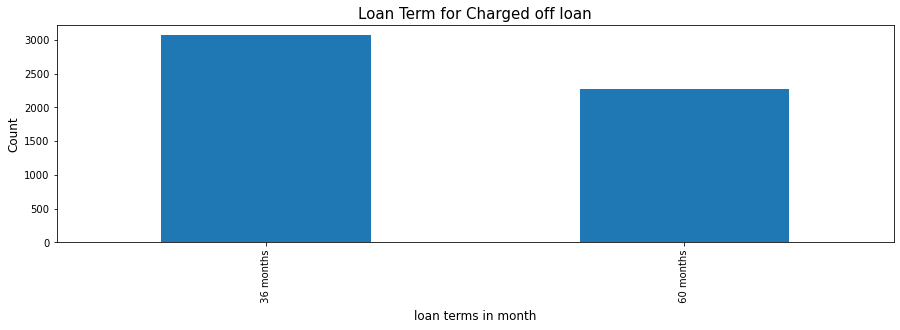

In [148]:
plt.figure(figsize=[15,4])
loan[loan.loan_status == "Charged Off"].term.value_counts().plot.bar()
plt.title("Loan Term for Charged off loan", fontsize=15)
plt.xlabel("loan terms in month",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

#### Observation
1. Maximum loan applied for tenure 36 months and maximum defaulters too.

##### Analyzing purpose of loan

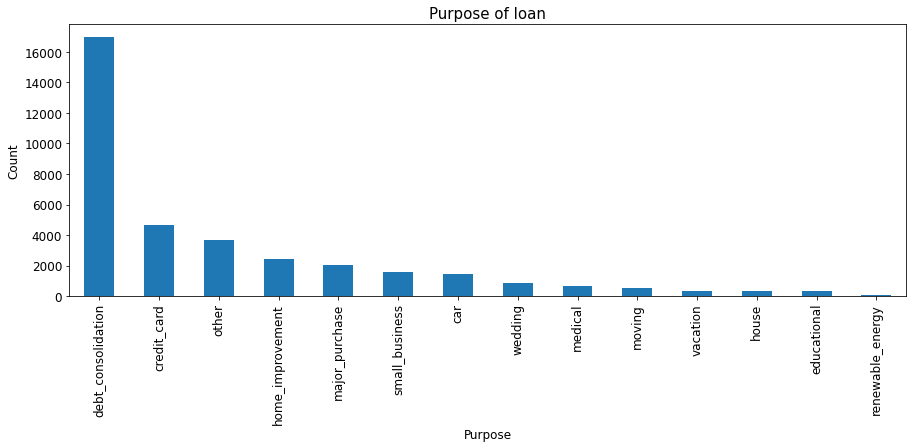

In [149]:
# What is the purpose of the loan applied for
plt.figure(figsize=[15,5])
loan.purpose.value_counts().plot.bar()
plt.title("Purpose of loan", fontsize=15)
plt.xlabel("Purpose",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

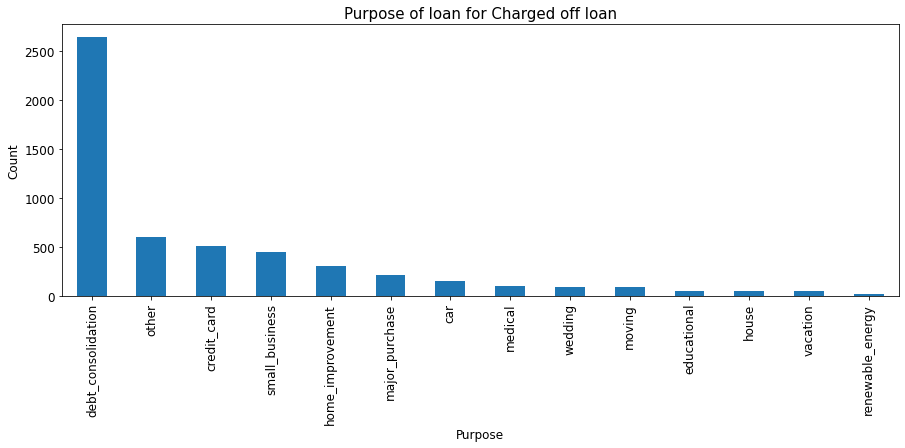

In [151]:
# What is the purpose of the loan applied for
plt.figure(figsize=[15,5])
loan[loan.loan_status == "Charged Off"].purpose.value_counts().plot.bar()
plt.title("Purpose of loan for Charged off loan", fontsize=15)
plt.xlabel("Purpose",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Observations
1. Maximum loan taken for debt consolidation and maximum defaulter are there too

##### Analyzing debt to income feature

In [167]:
#Bucketing of dti
dti_slab = (0,5, 20,36)
category =["Low (0-5)", "Medium(6-20)", "High( > 20)"]
loan["dti_category"] = pd.cut(loan.dti, dti_slab, labels = category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,initial_list_status,next_pymnt_d,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,income_category,loan_category,dti_category
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,f,NaN,0.0,1,0.0,0.0,0.0,Low,5K,High( > 20)
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,f,NaN,0.0,1,0.0,0.0,0.0,Low,5K,Low (0-5)
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,f,NaN,0.0,1,0.0,0.0,0.0,Low,5K,Medium(6-20)
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,f,NaN,0.0,1,0.0,0.0,0.0,Medium,5k-15K,Medium(6-20)
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,f,NaN,0.0,1,0.0,0.0,0.0,Low,5K,Medium(6-20)


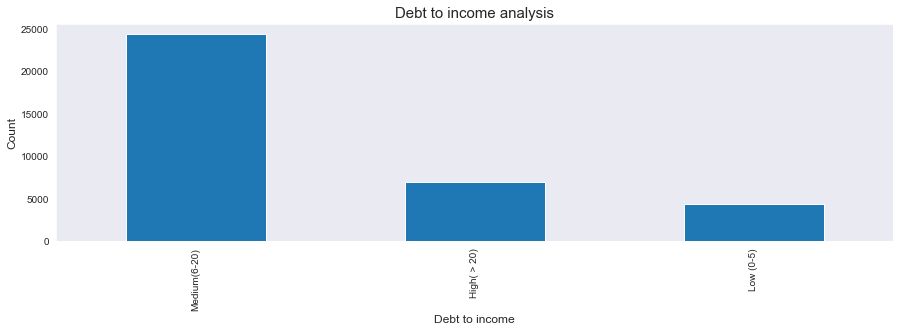

In [168]:
plt.figure(figsize=[15,4])
loan.dti_category.value_counts().plot.bar()
plt.title("Debt to income analysis", fontsize=15)
plt.xlabel("Debt to income",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

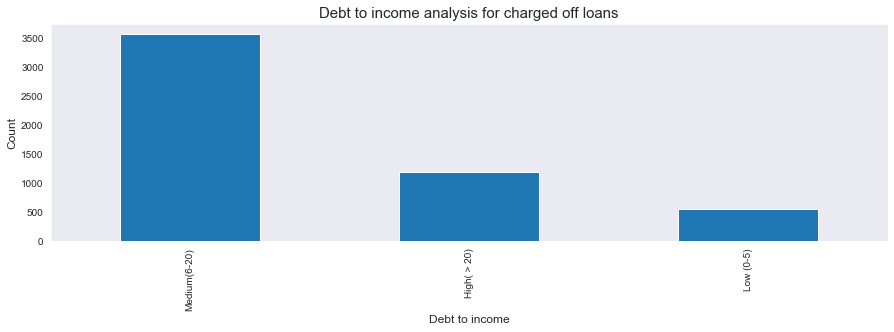

In [169]:
plt.figure(figsize=[15,4])
loan[loan.loan_status == "Charged Off"].dti_category.value_counts().plot.bar()
plt.title("Debt to income analysis for charged off loans", fontsize=15)
plt.xlabel("Debt to income",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()


In [170]:
(loan.groupby("dti_category")["dti_category"].count() / loan.dti_category.count() * 100).sort_values(ascending=False)

dti_category
Medium(6-20)    68.258458
High( > 20)     19.580439
Low (0-5)       12.161102
Name: dti_category, dtype: float64

In [171]:
(loan[loan.loan_status == "Charged Off"].groupby("dti_category")["dti_category"].count() / loan[loan.loan_status == "Charged Off"].dti_category.count() * 100).sort_values(ascending=False)

dti_category
Medium(6-20)    67.313489
High( > 20)     22.287114
Low (0-5)       10.399397
Name: dti_category, dtype: float64

#### Observation : 
1. 68% people having medium debt to income ratio ( 5- 20 ) has applied for loan and 67% of same categoty got defaulted

##### Analyzing interest rate
1. int_rate has Dtype as object
2. int_rate do not have any null value

In [172]:
loan.int_rate.info()

<class 'pandas.core.series.Series'>
Int64Index: 35874 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype 
--------------  ----- 
35874 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [173]:
loan.int_rate.isnull().sum()

0

In [175]:
#Converting to float 
loan.int_rate = loan.int_rate.apply(lambda x : x.replace("%","") if "%" in x else 0 )
loan.int_rate = loan.int_rate.astype("float64")

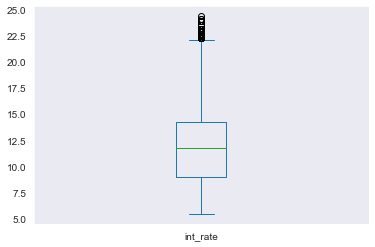

In [177]:
#Checking if there is any outlair or not
loan.int_rate.plot.box()
plt.show()

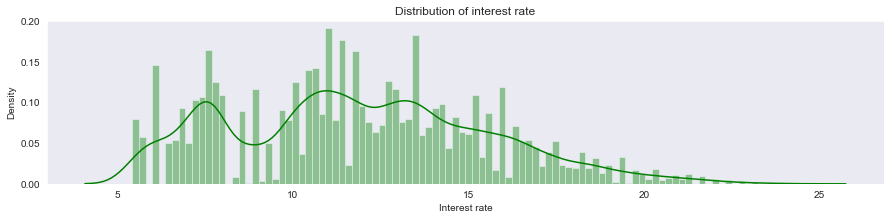

In [242]:
# Checking the distribution of interest rate charged
plt.figure(figsize=[15,3])
sns.set_style("dark")
sns.distplot(loan.int_rate,  bins=100,color="g")
plt.title("Distribution of interest rate", fontsize=12)
plt.xlabel("Interest rate")
plt.show()

In [180]:
#Bucketing of interest rate
interest_slab = (0,7, 15,30)
category =["Low (0-7)", "Medium(8-15)", "High( > 15)"]
loan["interest_category"] = pd.cut(loan.int_rate, interest_slab, labels = category)
loan.interest_category.unique()

['Medium(8-15)', 'High( > 15)', 'Low (0-7)']
Categories (3, object): ['Low (0-7)' < 'Medium(8-15)' < 'High( > 15)']

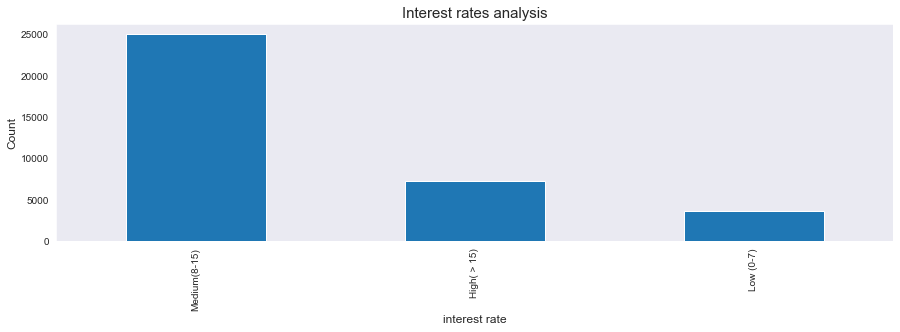

In [247]:
plt.figure(figsize=[15,4])
loan.interest_category.value_counts().plot.bar()
plt.title("Interest rates analysis", fontsize=15)
plt.xlabel("interest rate",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

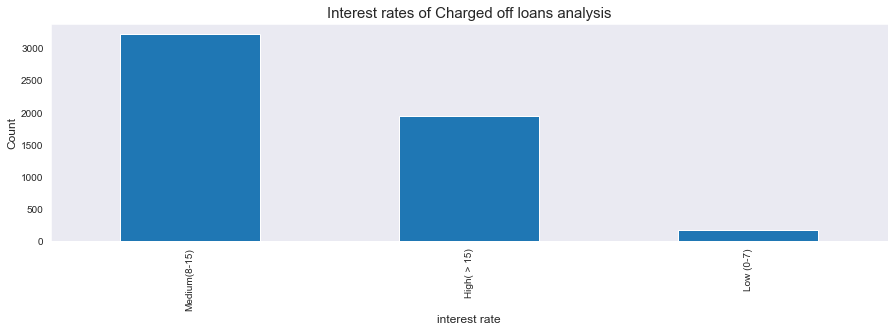

In [248]:
plt.figure(figsize=[15,4])
loan[loan.loan_status == "Charged Off"].interest_category.value_counts().plot.bar()
plt.title("Interest rates of Charged off loans analysis", fontsize=15)
plt.xlabel("interest rate",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [185]:
(loan.groupby("interest_category")["interest_category"].count() / loan.interest_category.count() * 100).sort_values(ascending=False)

interest_category
Medium(8-15)    69.794280
High( > 15)     20.187322
Low (0-7)       10.018398
Name: interest_category, dtype: float64

In [186]:
(loan[loan.loan_status == "Charged Off"].groupby("interest_category")["interest_category"].count() / loan[loan.loan_status == "Charged Off"].interest_category.count() * 100).sort_values(ascending=False)

interest_category
Medium(8-15)    60.363568
High( > 15)     36.394303
Low (0-7)        3.242129
Name: interest_category, dtype: float64

#### Observations
1. No outlier treatment is necessary as off now.
2. After bucketing the interest rate, we can see 70% loan are given with medium (8-15) % interest rate and 60% og the chared off loan lies in same interest category.

##### Analyzing employment length

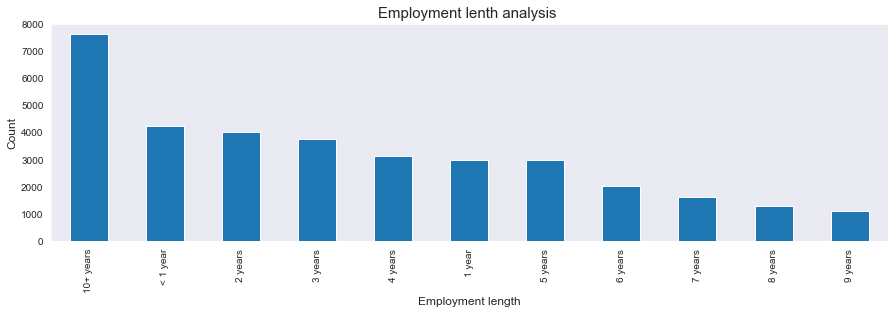

In [188]:
plt.figure(figsize=[15,4])
loan.emp_length.value_counts().plot.bar()
plt.title("Employment lenth analysis ", fontsize=15)
plt.xlabel("Employment length",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [189]:
(loan.groupby("emp_length")["emp_length"].count() / loan.emp_length.count() * 100).sort_values(ascending=False)

emp_length
10+ years    21.865588
< 1 year     12.144681
2 years      11.573875
3 years      10.744916
4 years       9.026762
1 year        8.605111
5 years       8.585033
6 years       5.819924
7 years       4.632418
8 years       3.760434
9 years       3.241259
Name: emp_length, dtype: float64

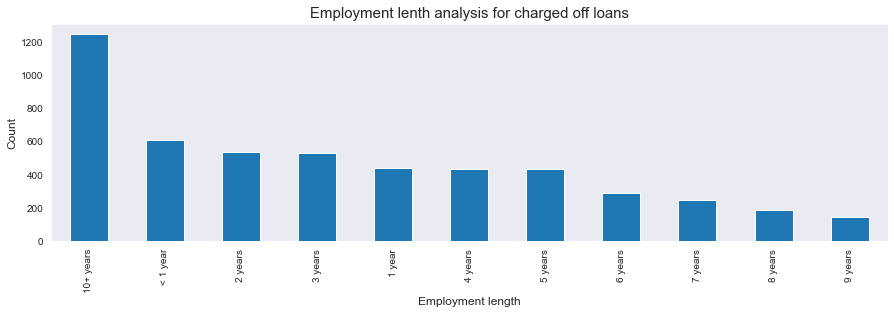

In [196]:
#For charged off loans
plt.figure(figsize=[15,4])
loan[loan.loan_status == "Charged Off"].emp_length.value_counts().plot.bar()
plt.title("Employment lenth analysis for charged off loans", fontsize=15)
plt.xlabel("Employment length",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [191]:
(loan[loan.loan_status == "Charged Off"].groupby("emp_length")["emp_length"].count() / loan[loan.loan_status == "Charged Off"].emp_length.count() * 100).sort_values(ascending=False)

emp_length
10+ years    24.378791
< 1 year     11.876345
2 years      10.565447
3 years      10.369791
1 year        8.648014
4 years       8.550186
5 years       8.530620
6 years       5.674036
7 years       4.871845
8 years       3.658775
9 years       2.876149
Name: emp_length, dtype: float64

#### Observations :
1. Employee having more than 10 years,2 years ,3 years and less than 1 year of employment have taken most loans ( 22%, 12%, 11% and 12% respectively ) and as well become defaulters in almost same rate.

##### Analysing home ownership

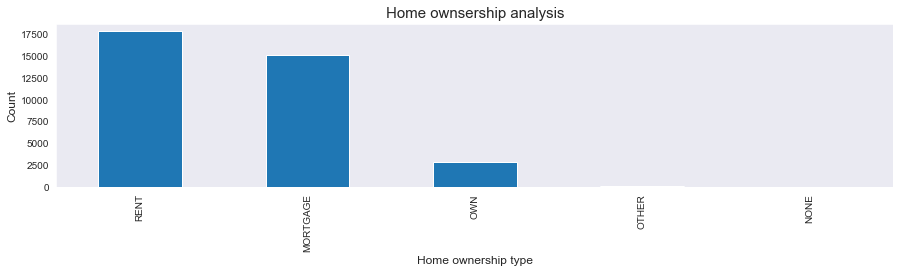

In [203]:
plt.figure(figsize=[15,3])
loan.home_ownership.value_counts().plot.bar()
plt.title("Home ownsership analysis", fontsize=15)
plt.xlabel("Home ownership type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [200]:
(loan.groupby("home_ownership")["home_ownership"].count() / loan.home_ownership.count() * 100).sort_values(ascending=False)

home_ownership
RENT        49.740759
MORTGAGE    42.155879
OWN          7.838546
OTHER        0.256453
NONE         0.008363
Name: home_ownership, dtype: float64

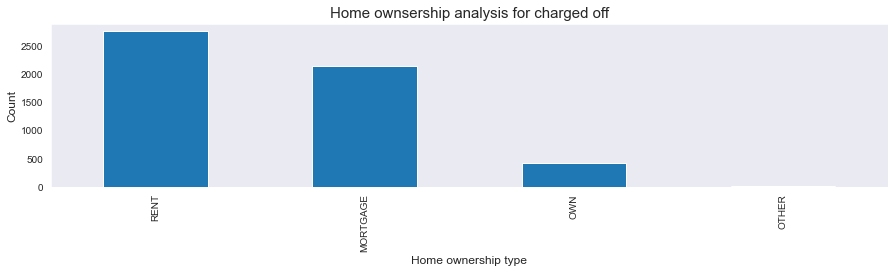

In [204]:
plt.figure(figsize=[15,3])
loan[loan.loan_status == "Charged Off"].home_ownership.value_counts().plot.bar()
plt.title("Home ownsership analysis for charged off", fontsize=15)
plt.xlabel("Home ownership type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [202]:
(loan[loan.loan_status == "Charged Off"].groupby("home_ownership")["home_ownership"].count() / loan[loan.loan_status == "Charged Off"].home_ownership.count() * 100).sort_values(ascending=False)

home_ownership
RENT        51.611694
MORTGAGE    40.029985
OWN          8.039730
OTHER        0.318591
Name: home_ownership, dtype: float64

#### Observation
1. 50% people living in rent and 42% people having mortgage has applied for loan and defulted in same rate respectively. 

##### Analyzing loan verification status

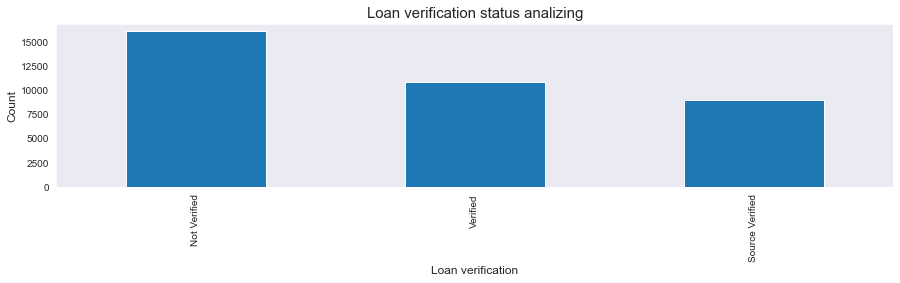

In [207]:
plt.figure(figsize=[15,3])
loan.verification_status.value_counts().plot.bar()
plt.title("Loan verification status analizing", fontsize=15)
plt.xlabel("Loan verification",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [206]:
(loan.groupby("verification_status")["verification_status"].count() / loan.verification_status.count() * 100).sort_values(ascending=False)

verification_status
Not Verified       44.823549
Verified           30.191782
Source Verified    24.984669
Name: verification_status, dtype: float64

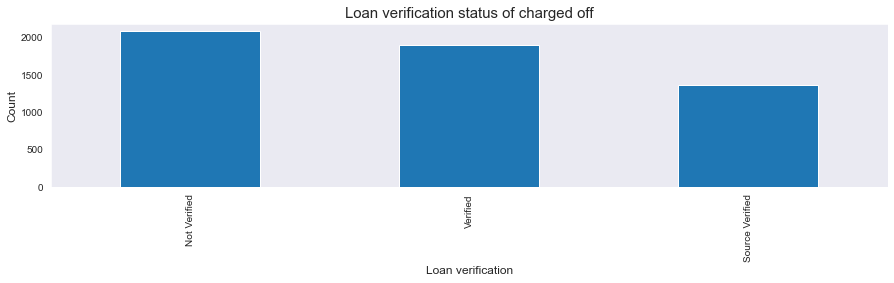

In [208]:
plt.figure(figsize=[15,3])
loan[loan.loan_status == "Charged Off"].verification_status.value_counts().plot.bar()
plt.title("Loan verification status of charged off", fontsize=15)
plt.xlabel("Loan verification",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [209]:
(loan[loan.loan_status == "Charged Off"].groupby("verification_status")["verification_status"].count() / loan[loan.loan_status == "Charged Off"].verification_status.count() * 100).sort_values(ascending=False)

verification_status
Not Verified       38.924288
Verified           35.644678
Source Verified    25.431034
Name: verification_status, dtype: float64

#### Observations 
1. verified + source verified loans ( 55% ) are mostly defaulters with respect to non verified loans.

##### Analyzing loan issue date

In [213]:
# creatig new column for loan issue month and splitting data in issue_d column
loan["loan_issue_month"]=loan.issue_d.apply(lambda x : x.split("-")[0].strip())
loan.loan_issue_month.unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

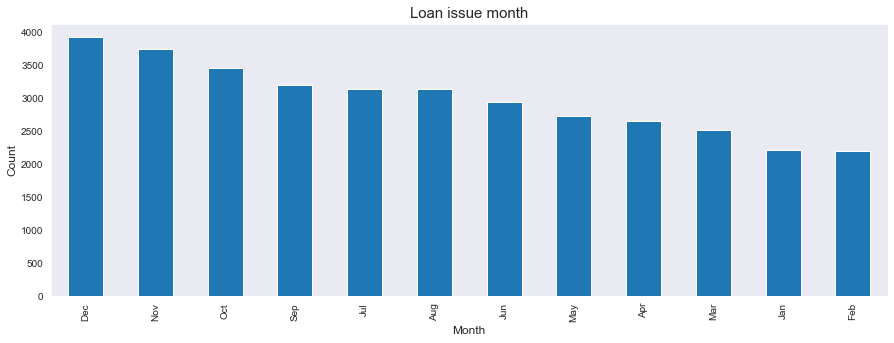

In [220]:
plt.figure(figsize=[15,5])
loan.loan_issue_month.value_counts().plot.bar()
plt.title("Loan issue month", fontsize=15)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

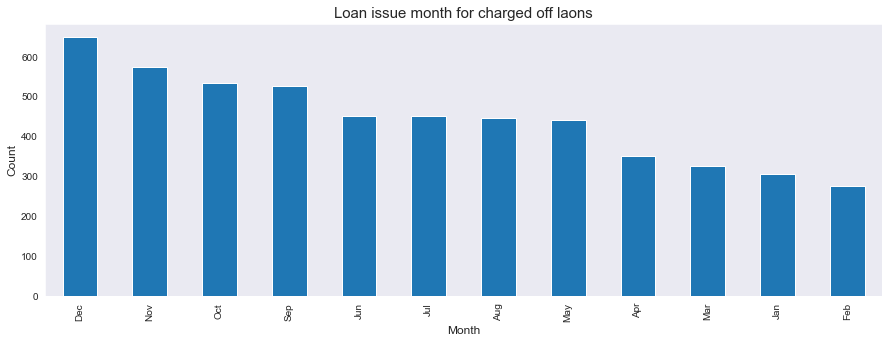

In [221]:
plt.figure(figsize=[15,5])
loan[loan.loan_status == "Charged Off"].loan_issue_month.value_counts().plot.bar()
plt.title("Loan issue month for charged off laons", fontsize=15)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [223]:
(loan[loan.loan_status == "Charged Off"].groupby("loan_issue_month")["loan_issue_month"].count() / loan[loan.loan_status == "Charged Off"].loan_issue_month.count() * 100).sort_values(ascending=False)

loan_issue_month
Dec    12.181409
Nov    10.757121
Oct    10.026237
Sep     9.876312
Jun     8.470765
Jul     8.452024
Aug     8.377061
May     8.283358
Apr     6.577961
Mar     6.128186
Jan     5.715892
Feb     5.153673
Name: loan_issue_month, dtype: float64

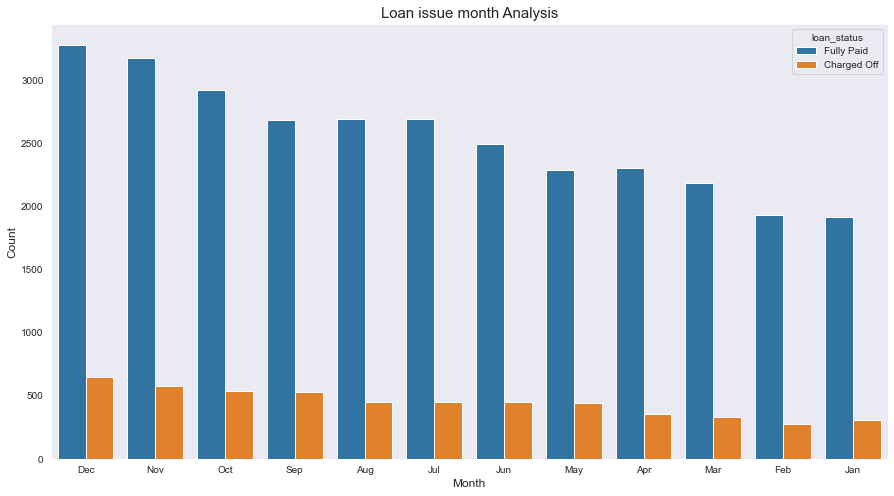

In [354]:
plt.figure(figsize=[15,8])
#loan[loan.loan_status == "Charged Off"].loan_issue_month.value_counts().plot.bar()
sns.countplot(x='loan_issue_month', data=loan, hue = 'loan_status' )
plt.title("Loan issue month Analysis", fontsize=15)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

#### Observations :
1. clearly there are three segments months for charged off loan.
2. Segment 1 ( Sept, Oct, Nov and Dec ), when the maximun loan were applied and defaulted (43 %) too.
3. Segment 2 ( May, Aug, Jun and July ), when good number of loan were applied and defaulted (32%) too.
4. Segment 3 ( Jan, Feb, March , Apr ), when mimimum number of loans are applied for and 25% of the loan are charged off.

##### Analyzing grades and sub grades

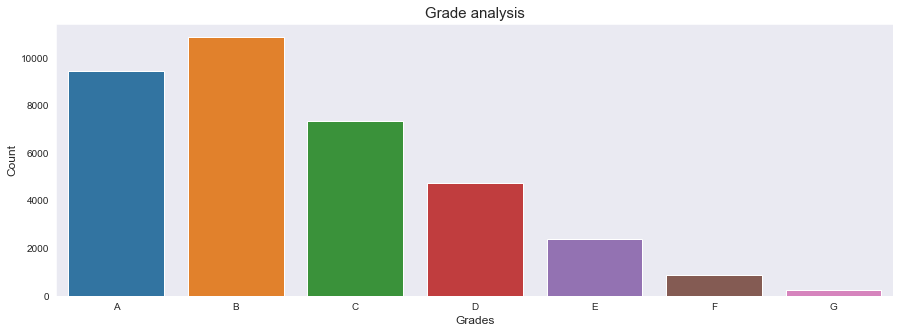

In [334]:
plt.figure(figsize=[15,5])
#loan.grade.value_counts().plot.bar()
sns.countplot(x ='grade', data=loan, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title("Grade analysis", fontsize=15)
plt.xlabel("Grades",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [231]:
(loan.groupby("grade")["grade"].count() / loan.grade.count() * 100).sort_values(ascending=False)

grade
B    30.333947
A    26.384011
C    20.427050
D    13.165524
E     6.600881
F     2.391704
G     0.696884
Name: grade, dtype: float64

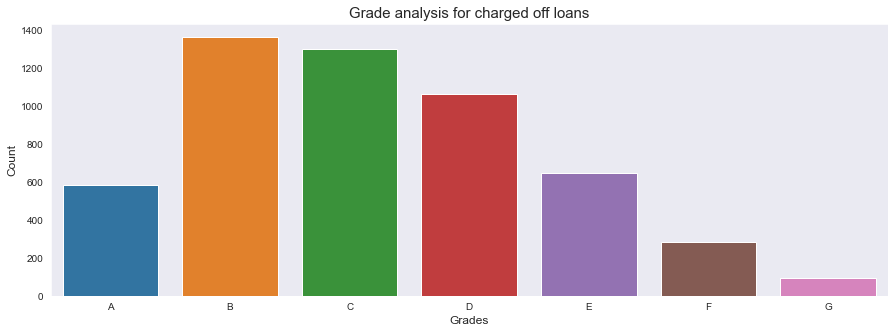

In [335]:
plt.figure(figsize=[15,5])
sns.countplot(x='grade',data=loan[loan.loan_status == "Charged Off"],order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] )
#loan[loan.loan_status == "Charged Off"].grade.value_counts().plot.bar()
plt.title("Grade analysis for charged off loans", fontsize=15)
plt.xlabel("Grades",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [235]:
(loan[loan.loan_status == "Charged Off"].groupby("grade")["grade"].count() / loan[loan.loan_status == "Charged Off"].grade.count() * 100).sort_values(ascending=False)

grade
B    25.562219
C    24.381559
D    19.883808
E    12.106447
A    10.982009
F     5.322339
G     1.761619
Name: grade, dtype: float64

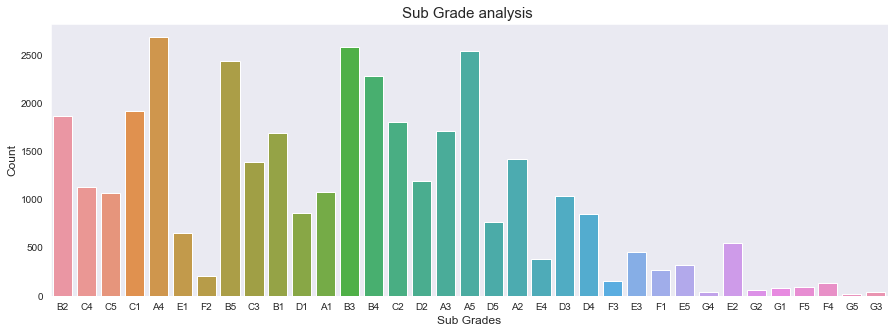

In [300]:
plt.figure(figsize=[15,5])
#loan.sub_grade.value_counts().plot.bar()
sns.countplot(x='sub_grade', data=loan)
plt.title("Sub Grade analysis ", fontsize=15)
plt.xlabel("Sub Grades",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

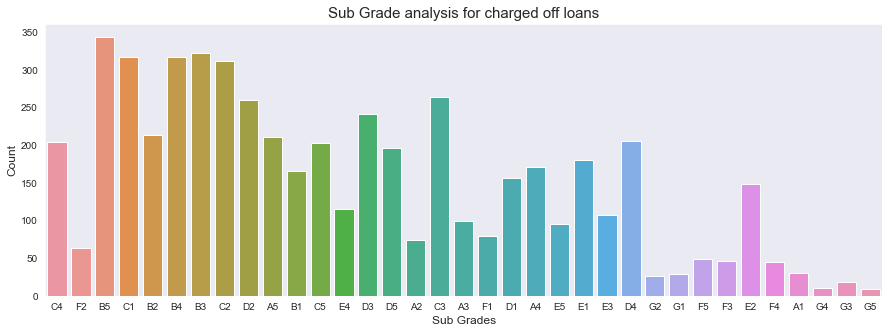

In [301]:
plt.figure(figsize=[15,5])
#loan[loan.loan_status == "Charged Off"].sub_grade.value_counts().plot.bar()
sns.countplot(x='sub_grade', data=loan[loan.loan_status == "Charged Off"])
plt.title("Sub Grade analysis for charged off loans", fontsize=15)
plt.xlabel("Sub Grades",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

#### Observations : 
1. Grade C , D and E categry loans are more risky compared to others grade loans as the defaulter percentage (24%, 20 % and 12 % repectively ) is higher than the percentage of people applied for ( 20% 13% and 7% repectively ).
2. Not getting any insight of sub gradation from univariate analysys.

### Bivariate analysis

 ##### Anlyzing continuious variables

In [254]:
# creating new column term_month from term having only month number
loan["term_month"] = loan.term.apply(lambda x : int(x.strip().split(" ")[0].strip()))
loan.term_month.dtype

dtype('int64')

In [257]:
loan.term_month.value_counts()

36    27183
60     8691
Name: term_month, dtype: int64

In [285]:
clarged_off_loans =  loan[loan.loan_status == "Charged Off"]
loan_correlation = clarged_off_loans[["loan_amnt","int_rate","annual_inc","dti","term_month"]].corr()
loan_correlation

,loan_amnt,int_rate,annual_inc,dti,term_month
loan_amnt,1.000000,0.336444,0.469361,0.083090,0.392861
int_rate,0.336444,1.000000,0.157092,0.045039,0.453796
annual_inc,0.469361,0.157092,1.000000,-0.016878,0.138370
dti,0.083090,0.045039,-0.016878,1.000000,0.067253
term_month,0.392861,0.453796,0.138370,0.067253,1.000000


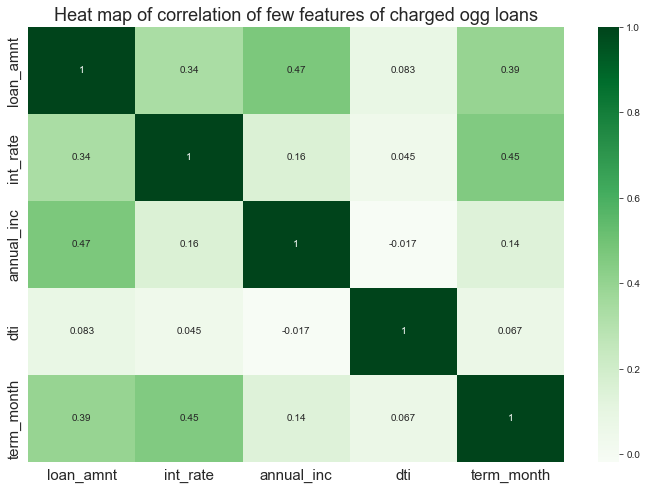

In [323]:
plt.figure(figsize=[12,8])
sns.heatmap(loan_correlation,cmap="Greens", annot=True)
plt.title("Heat map of correlation of few features of charged ogg loans", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations from charged of dataset
1. Negavative corelation between dti and annual income is natual as dti is calculated with anual income as denominator.
2. Loan term has positive corelation ( ~ 0.4 ) with loan amount and interest rate, so loan with higher term , higher loan amount and higher interest rate have possibility of getting defaulters.
 

##### Analyzing grade and sub grade 

In [336]:
#Extracting sub grade int value from sub grade column
loan["sub_grade_int"] = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan[["sub_grade_int","sub_grade"]].head(10)

,sub_grade_int,sub_grade
0,2,B2
1,4,C4
2,5,C5
3,1,C1
5,4,A4
6,5,C5
7,1,E1
8,2,F2
9,5,B5
10,3,C3


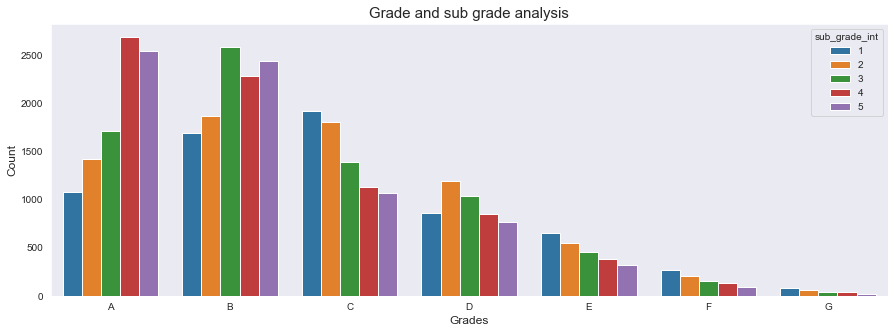

In [325]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'grade',data = loan, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_int')
plt.title("Grade and sub grade analysis", fontsize=15)
plt.xlabel("Grades",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

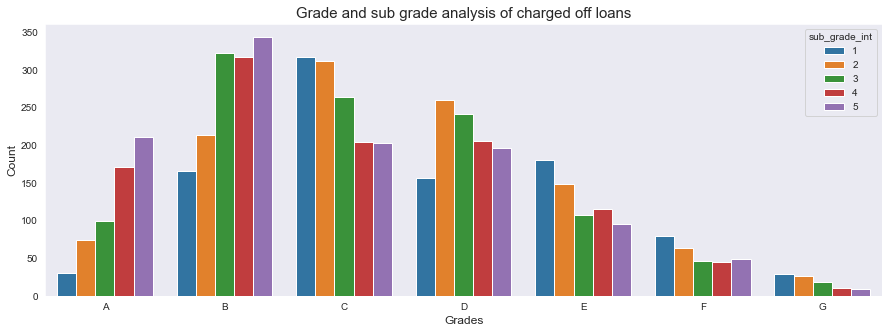

In [327]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'grade',data = loan[loan.loan_status == "Charged Off"], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_int')
plt.title("Grade and sub grade analysis of charged off loans", fontsize=15)
plt.xlabel("Grades",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

#### Observations
1. From univariate analusis of grade we got following :

Grade C , D and E categry loans are more risky compared to others grade loans as the defaulter percentage (24%, 20 % and 12 % repectively ) is higher than the percentage of people applied for ( 20% 13% and 7% repectively ).

2. From bivariate analysis,we can observe with in C grade loan, C1 and C2 are more risky.
3. From bivariate analysis,we can observe with in D grade loan, D2 and D3 are more risky.
4. From bivariate analysis,we can observe with in E grade loan, E1 and E2 are more risky.

##### Analyzing loan amount with  interest rate 

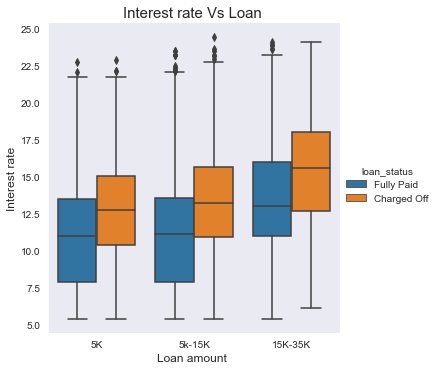

In [410]:
sns.catplot(data=loan, x='loan_category', y='int_rate', hue='loan_status', kind='box')
plt.title("Interest rate Vs Loan ", fontsize=15)
plt.xlabel("Loan amount ",fontsize=12)
plt.ylabel("Interest rate",fontsize=12)
plt.show()

##### Analyzing loan amount with loan term

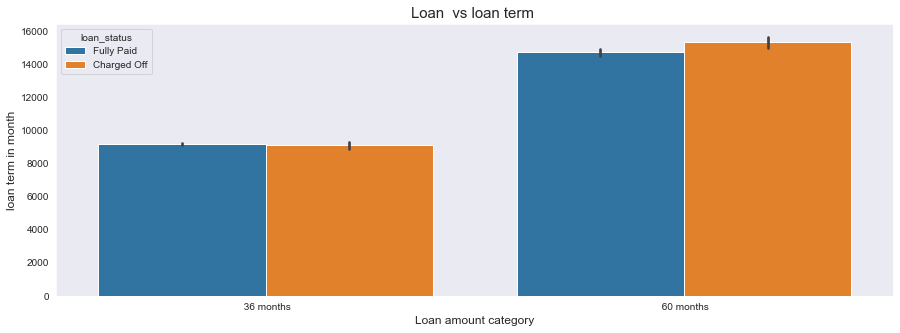

In [409]:
plt.figure(figsize=[15,5])
sns.barplot(data=loan, x='term', y='loan_amnt', hue = 'loan_status')
plt.title("Loan  vs loan term ", fontsize=15)
plt.xlabel("Loan amount category",fontsize=12)
plt.ylabel("loan term in month",fontsize=12)
plt.show()

##### Analyzing Loan amount with Home ownership

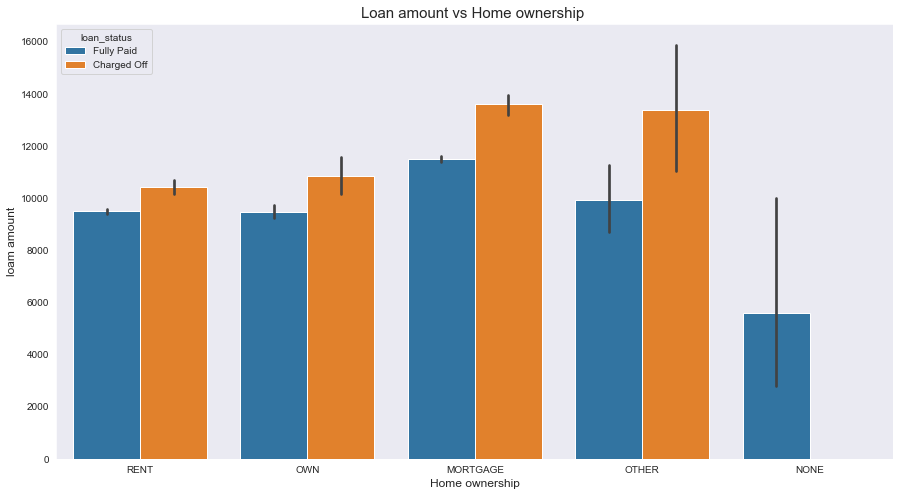

In [414]:
plt.figure(figsize=(15,8))
sns.barplot(data=loan, x='home_ownership', y='loan_amnt', hue = 'loan_status')
plt.title("Loan amount vs Home ownership ", fontsize=15)
plt.xlabel("Home ownership",fontsize=12)
plt.ylabel("loam amount",fontsize=12)
plt.show()

##### Analyzing loan amount with  purpose of loan

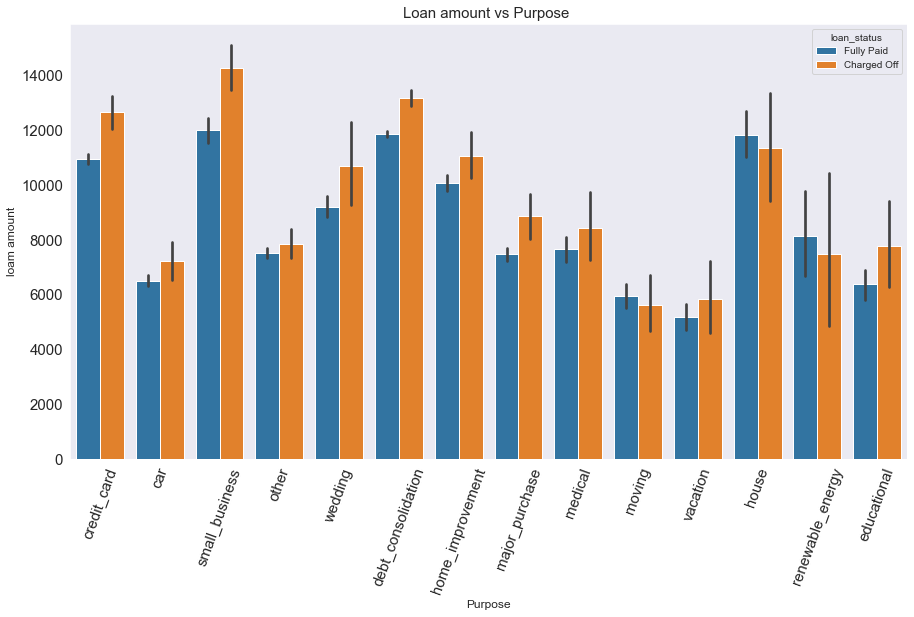

In [413]:
plt.figure(figsize=(15,8))
#sns.catplot(data=loan, x='purpose', y='loan_amnt', hue = 'loan_status',kind='box')
sns.barplot(data=loan, x='purpose', y='loan_amnt', hue = 'loan_status')
plt.title("Loan amount vs Purpose ", fontsize=15)
plt.xlabel("Purpose",fontsize=12)
plt.ylabel("loam amount",fontsize=12)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

##### Analyzing loan amount with Employment length

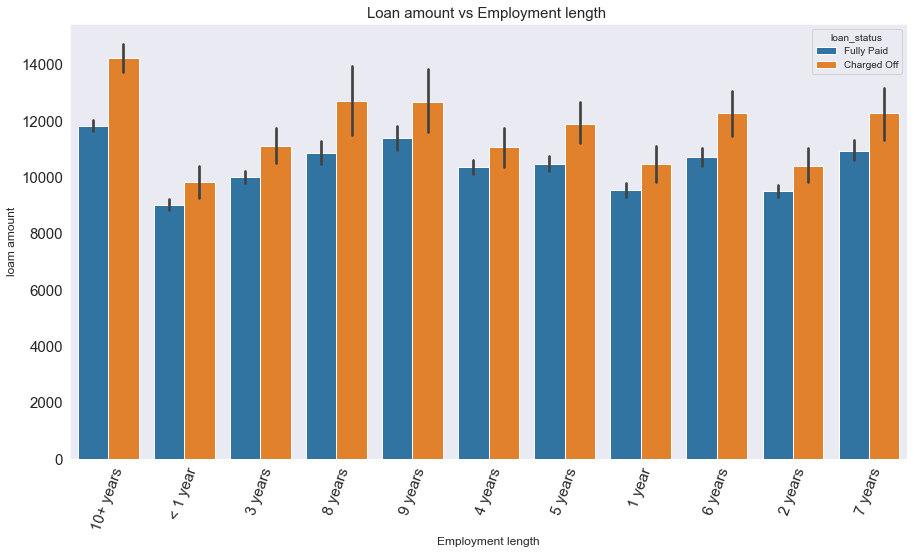

In [417]:
plt.figure(figsize=(15,8))
sns.barplot(data=loan, x='emp_length', y='loan_amnt', hue = 'loan_status')
plt.title("Loan amount vs Employment length ", fontsize=15)
plt.xlabel("Employment length",fontsize=12)
plt.ylabel("loam amount",fontsize=12)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

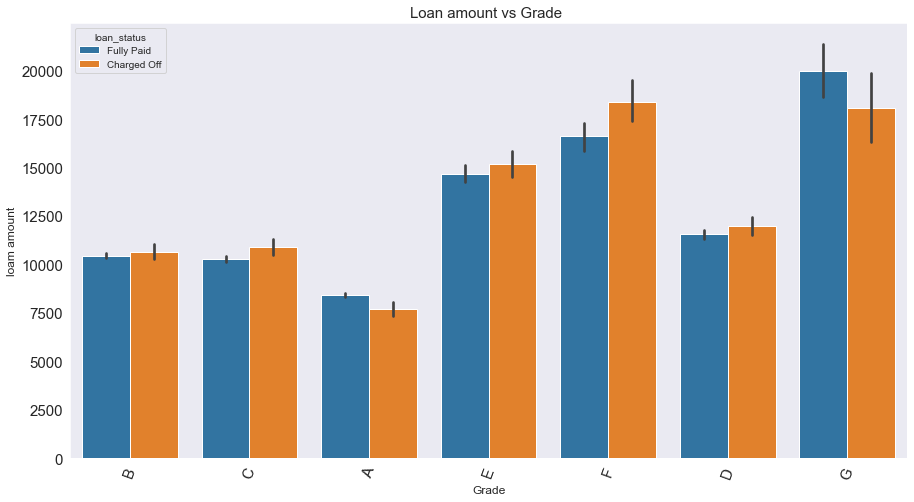

In [437]:
plt.figure(figsize=(15,8))
sns.barplot(data=loan, x='grade', y='loan_amnt', hue = 'loan_status')
plt.title("Loan amount vs Grade ", fontsize=15)
plt.xlabel("Grade",fontsize=12)
plt.ylabel("loam amount",fontsize=12)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observation : 
1. Interest rate of charged off loan are pretty high than that of fully paid off loans ( compair the 75% and 90% percentile of boxes of each category ).
2. Loan with more amout for 60 months tends to be risky.

3. Higher loan amount with other and mortage category of home ownership tends to be risky. But there more error data indicated by longer straight line at top of the bar. 

4. Higher loan amount with purpose as small business, cerit card, wedding, debt consolidation and house seems to be risky loan. 

5. Higher loan amout taken by folks having employment more than 10 years seems to be risky loan.

##### Analyzing annual income with loan purpose

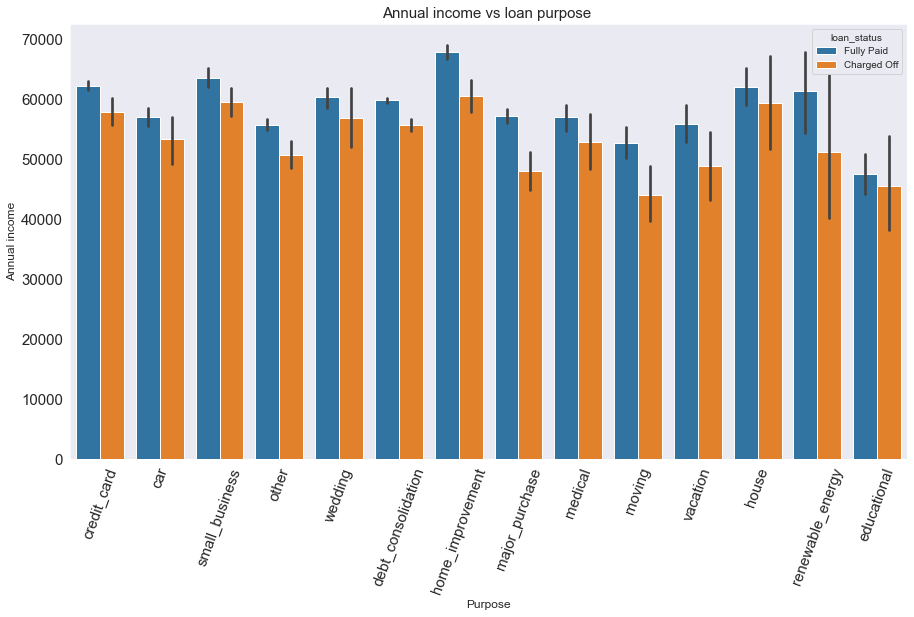

In [420]:
plt.figure(figsize=(15,8))
sns.barplot(data=loan, x='purpose', y='annual_inc', hue = 'loan_status')
plt.title("Annual income vs loan purpose ", fontsize=15)
plt.xlabel("Purpose",fontsize=12)
plt.ylabel("Annual income",fontsize=12)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

##### Analyzing annual income with home ownership

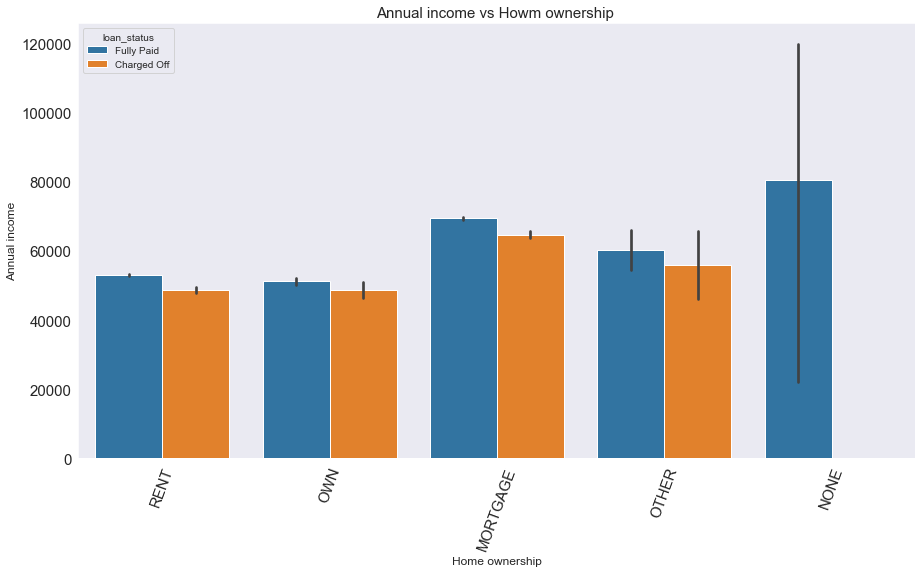

In [421]:
plt.figure(figsize=(15,8))
sns.barplot(data=loan, x='home_ownership', y='annual_inc', hue = 'loan_status')
plt.title("Annual income vs Howm ownership ", fontsize=15)
plt.xlabel("Home ownership",fontsize=12)
plt.ylabel("Annual income",fontsize=12)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<Figure size 1080x576 with 0 Axes>

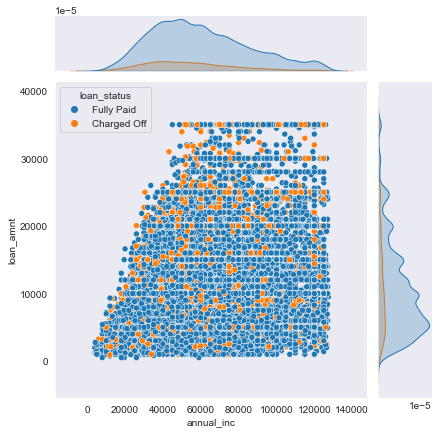

In [434]:
# Scatter plot of annual income vs loan amount
sns.jointplot(data = loan,x ='annual_inc', y='loan_amnt', hue='loan_status')

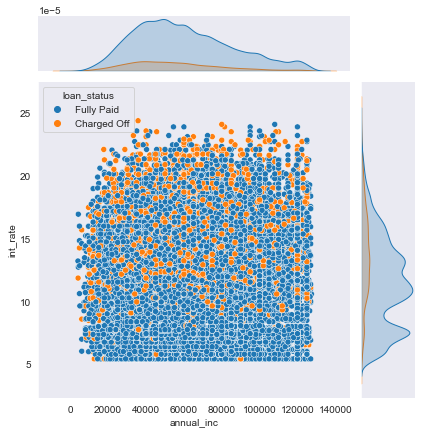

In [436]:
# Scatter plot of annual income vs interest rate
sns.jointplot(data = loan,x ='annual_inc', y='int_rate', hue='loan_status')

#### Observations :
1. For middle income group, loan with home ownership mortgage seems to be risky.
2. Higher loan amount tends to be risky for middle income group.
3. Higher interest rate loan tends to be risky for all income group

## Over all observations
##### Probability of loan to be more risky ( defauting ) in followiung scenario
1. Lender with middle income group ( 40K to 60K ) with higher loan amount.
2. Lender accross all income group with higher interest rate.
3. Lender with middle income group ( 40K to 60K ) has taken higher loan amount with home ownership as mortgage.
4. Loan with more loan amount for longer duration.
5. Higher loan amount with purpose as small business, cerit card, wedding, debt consolidation and house.
6. Loan with loan grade C with sub grade C1 and C2, grade D with sub grade D2 and D3, grade E with sub grade E1 and E1 having loan amount betweein 10K to 15K.